In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

### Read dataset

In [61]:
df = pd.read_csv('/content/drive/MyDrive/US_Accidents_Dec20_updated.csv')

In [62]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [64]:
df.nunique()

ID                       1516064
Severity                       4
Start_Time               1037092
End_Time                 1161415
Start_Lat                 590611
Start_Lng                 603369
End_Lat                   587824
End_Lng                   599916
Distance(mi)               11514
Description               527655
Number                     37592
Street                     93048
Side                           2
City                       10657
County                      1671
State                         49
Zipcode                   177196
Country                        1
Timezone                       4
Airport_Code                1985
Weather_Timestamp         331748
Temperature(F)               775
Wind_Chill(F)                883
Humidity(%)                  100
Pressure(in)                1007
Visibility(mi)                74
Wind_Direction                24
Wind_Speed(mph)              121
Precipitation(in)            187
Weather_Condition            116
Amenity   

In [65]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [67]:
bool_cols = [col for col in df.columns if df[col].dtype ==np.dtype('bool')]
booldf = df[bool_cols]
not_one_hot = booldf[booldf.sum(axis=1) > 1]
print('There are {} non one hot metadata rows, which are {:.1f}% of the data'.format(len(not_one_hot),100*len(not_one_hot)/len(df)))

There are 88896 non one hot metadata rows, which are 5.9% of the data


In [68]:
bools = booldf.sum(axis=0)

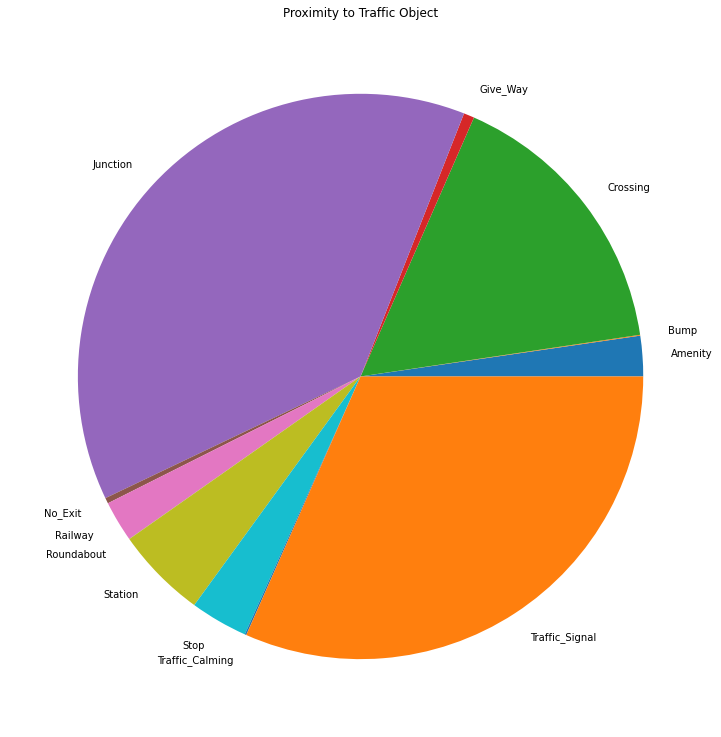

In [69]:
bools.plot.pie(figsize=(13,13))
plt.ylabel('')
plt.title('Proximity to Traffic Object');

In [70]:
st = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
end = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')

top 20 accident durations correspond to 59.4% of the data


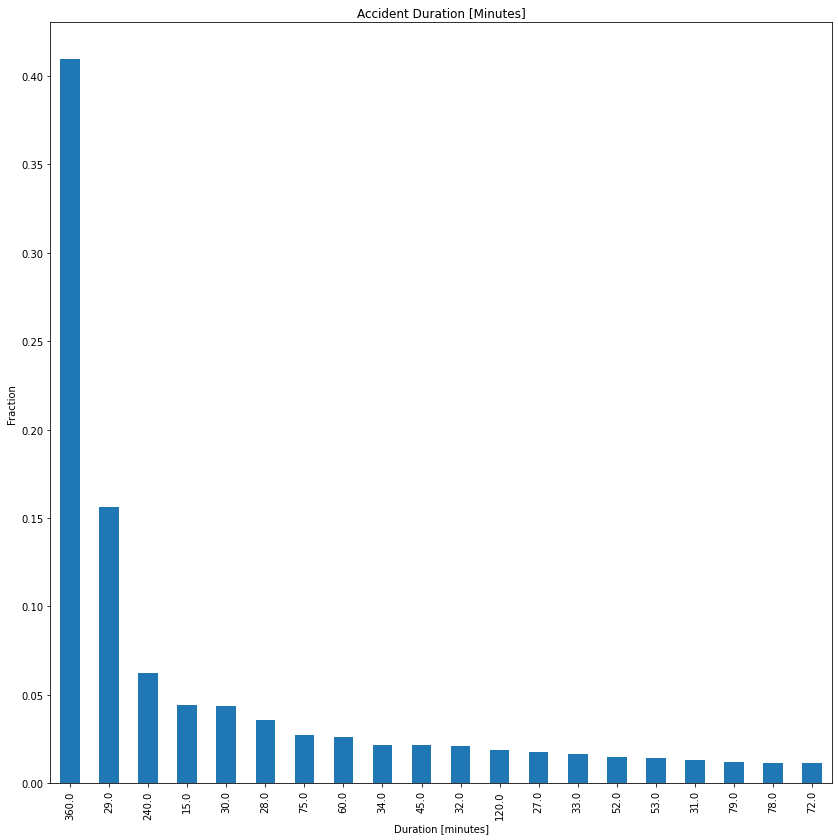

In [71]:
diff = (end-st)
top20 = diff.astype('timedelta64[m]').value_counts().nlargest(20)
print('top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(diff)))
(top20/top20.sum()).plot.bar(figsize=(14,14))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [minutes]')
plt.ylabel('Fraction');

In [72]:
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
df = df.set_index('time')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 05:56:20,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 06:15:39,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:15:39,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:51:45,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


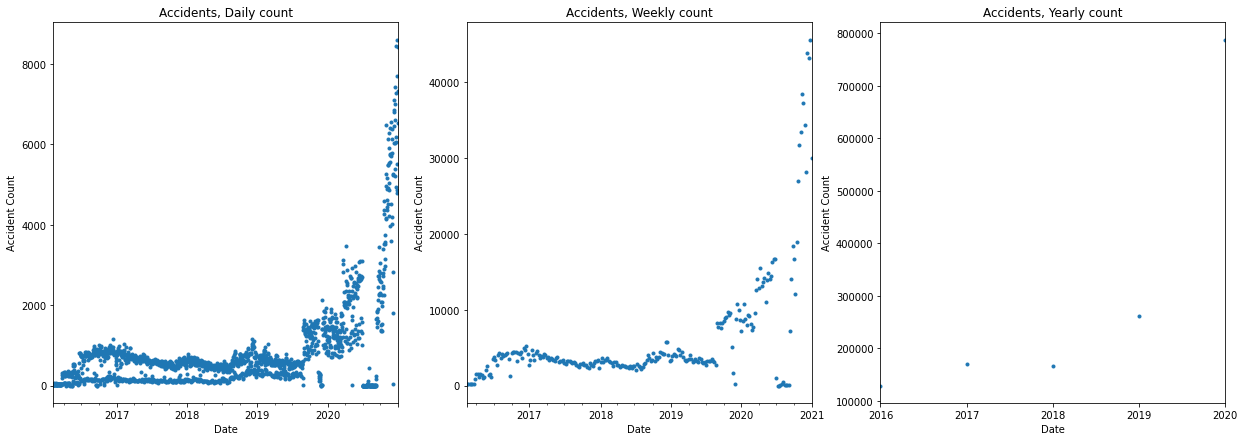

In [73]:
freq_text = {'D':'Daily','W':'Weekly','Y':'Yearly'}
plt.subplots(1,3,figsize=(21,7))
for i, (fr,text) in enumerate(freq_text.items(),1):
    plt.subplot(1,3,i)
    sample = df.ID['2016':].resample(fr).count()
    sample.plot(style='.')
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

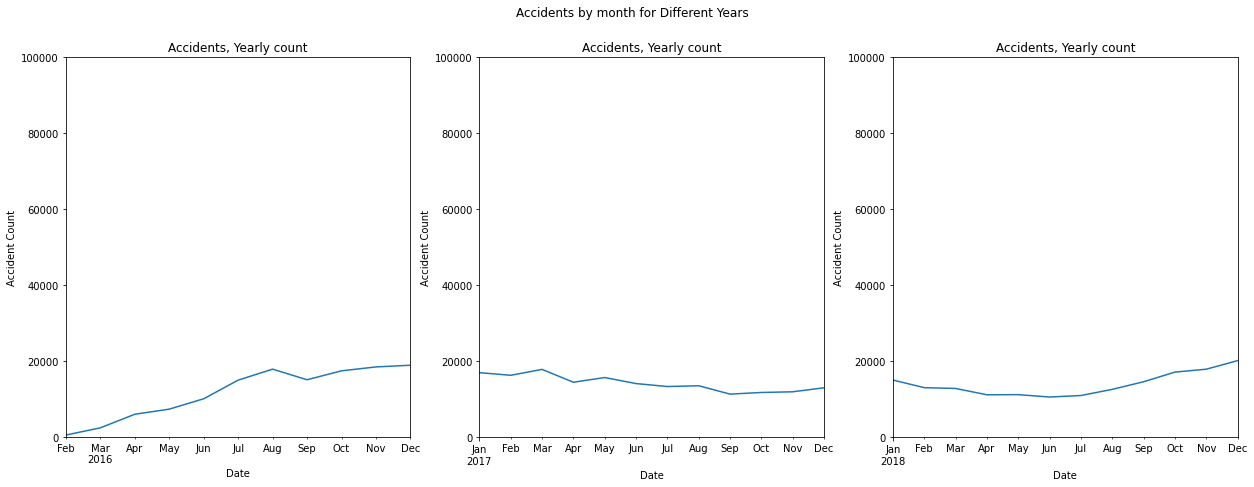

In [74]:
years = ['2016','2017','2018']
fig, _ = plt.subplots(1,3,figsize=(21,7), sharex='all', sharey='all')

fig.suptitle('Accidents by month for Different Years')
plt.xlabel('month')
plt.ylabel('Accidents')
for i, year in enumerate(years,1):
    plt.subplot(1,3,i)
    sample = df.loc[year].ID.resample('M').count()
    sample.plot()
    plt.ylim(0,100000)
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

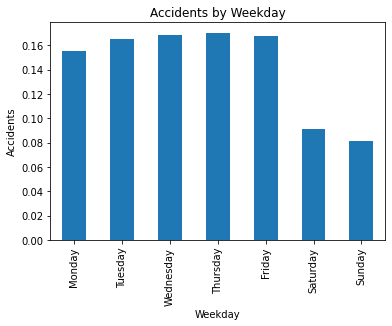

In [75]:
df['Weekday'] = df.index.day_name()
weekday = df.groupby('Weekday').ID.count()
weekday = weekday/weekday.sum()
dayOfWeek=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday[dayOfWeek].plot.bar()
plt.title('Accidents by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Accidents');

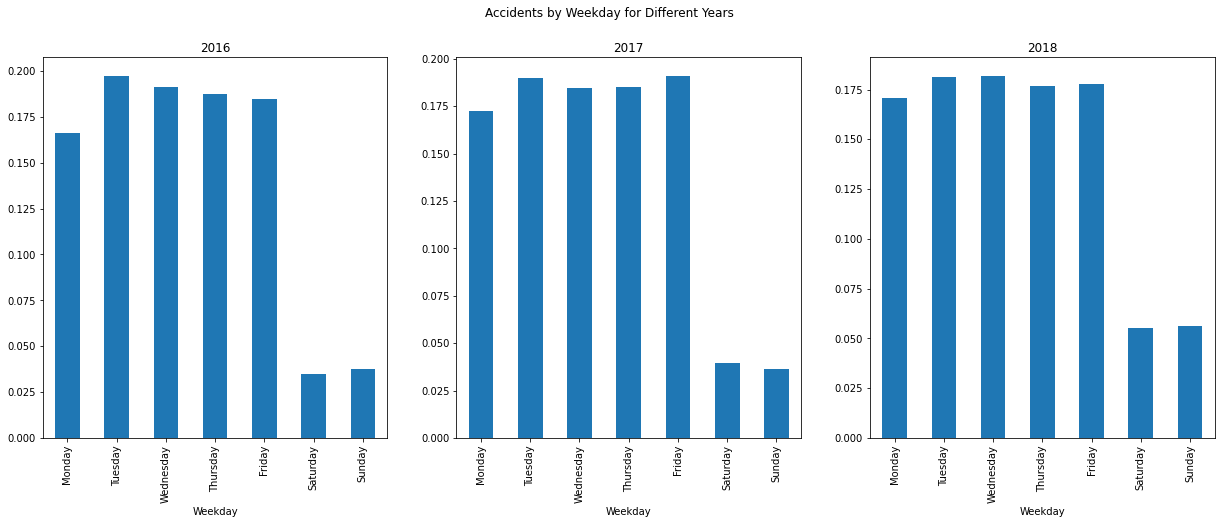

In [76]:
years = ['2016','2017','2018']
fig, _ = plt.subplots(1,3,figsize=(21,7), sharex='all', sharey='all')

fig.suptitle('Accidents by Weekday for Different Years')
plt.xlabel('Weekday')
plt.ylabel('Accidents')
for i, year in enumerate(years,1):
    weekday = df.loc[year].groupby('Weekday').ID.count()
    weekday = weekday/weekday.sum()
    dayOfWeek=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    plt.subplot(1,3,i)
    plt.title(year)
    weekday[dayOfWeek].plot.bar()

In [77]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix, fontsize=15')
    plt.show()

In [80]:
df1 = df

In [81]:
df1.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [82]:
df1.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weekday
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Monday
2016-02-08 05:56:20,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Monday
2016-02-08 06:15:39,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,Monday
2016-02-08 06:15:39,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,Monday
2016-02-08 06:51:45,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,Monday


In [83]:
df1 = df1.drop(['Distance(mi)', 'Country', 'Description', 'City', 'County', 'Street', 'Side', 'Zipcode', 'State', 'Airport_Code', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)

In [84]:
cols = ["End_Lat", "End_Lng", "Number"]
df1 = df1.drop(cols, axis=1)

In [85]:
df1.isnull().sum()

ID                        0
Severity                  0
Start_Time                0
End_Time                  0
Start_Lat                 0
Start_Lng                 0
Timezone               2302
Weather_Timestamp     30264
Temperature(F)        43033
Wind_Chill(F)        449316
Humidity(%)           45509
Pressure(in)          36274
Visibility(mi)        44211
Wind_Direction        41858
Wind_Speed(mph)      128862
Precipitation(in)    510549
Weather_Condition     44007
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Turning_Loop              0
Sunrise_Sunset           83
Weekday                   0
dtype: int64

In [86]:
pmean = df1['Pressure(in)'].mean()
tmean = df1['Temperature(F)'].mean()
wcmean = df1['Wind_Chill(F)'].mean()
hmean = df1['Humidity(%)'].mean()
wsmean = df1['Wind_Speed(mph)'].mean()
prmean = df1['Precipitation(in)'].mean()

In [87]:
df1['Pressure(in)']=df1['Pressure(in)'].fillna(pmean)

In [88]:
df1['Temperature(F)'] = df1['Temperature(F)'].fillna(tmean)

In [89]:
df1['Wind_Chill(F)'] = df1['Wind_Chill(F)'].fillna(wcmean)

In [90]:
df1['Humidity(%)'] = df1['Humidity(%)'].fillna(hmean)

In [91]:
df1['Wind_Speed(mph)'] = df1['Wind_Speed(mph)'].fillna(wsmean)

In [92]:
df1['Precipitation(in)']=df1['Precipitation(in)'].fillna(prmean)

In [93]:
df1.isnull().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Timezone              2302
Weather_Timestamp    30264
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)       44211
Wind_Direction       41858
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition    44007
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset          83
Weekday                  0
dtype: int64

In [94]:
df1.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Timezone', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Weekday'],
      dtype='object')

In [95]:
visMode = df1["Visibility(mi)"].mode()
#df1["Visibility(mi)"]=df1["Visibility(mi)"].fillna(visMode)

In [96]:
#df1["Visibility(mi)"]=df1["Visibility(mi)"].fillna(visMode)
df1['Visibility(mi)'] = df1['Visibility(mi)'].fillna(df1['Visibility(mi)'].mode()[0])
df1['Wind_Direction'] = df1['Wind_Direction'].fillna(df1['Wind_Direction'].mode()[0])
df1['Weather_Condition'] = df1['Weather_Condition'].fillna(df1['Weather_Condition'].mode()[0])
#df1['Sunrise_Sunset'] = df1['Sunrise_Sunset'].fillna(df1['Sunrise_Sunset'].mode()[0])

In [97]:
df1.drop(['Timezone','Weather_Timestamp', 'Start_Time', 'End_Time', 'ID'], axis = 1, inplace = True)

In [98]:
df1.isnull().sum()

Severity              0
Start_Lat             0
Start_Lng             0
Temperature(F)        0
Wind_Chill(F)         0
Humidity(%)           0
Pressure(in)          0
Visibility(mi)        0
Wind_Direction        0
Wind_Speed(mph)       0
Precipitation(in)     0
Weather_Condition     0
Amenity               0
Bump                  0
Crossing              0
Give_Way              0
Junction              0
No_Exit               0
Railway               0
Roundabout            0
Station               0
Stop                  0
Traffic_Calming       0
Traffic_Signal        0
Turning_Loop          0
Sunrise_Sunset       83
Weekday               0
dtype: int64

In [99]:
df1.dropna(axis=0, inplace=True)

In [100]:
df1.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Weekday'],
      dtype='object')

In [101]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['Amenity'] = label_encoder.fit_transform(df1['Amenity'])
df1['Bump'] = label_encoder.fit_transform(df1['Bump'])
df1['Crossing'] = label_encoder.fit_transform(df1['Crossing'])
df1['Give_Way'] = label_encoder.fit_transform(df1['Give_Way'])
df1['Junction'] = label_encoder.fit_transform(df1['Junction'])
df1['No_Exit'] = label_encoder.fit_transform(df1['No_Exit'])
df1['Railway'] = label_encoder.fit_transform(df1['Railway'])
df1['Roundabout'] = label_encoder.fit_transform(df1['Roundabout'])
df1['Station'] = label_encoder.fit_transform(df1['Station'])
df1['Stop'] = label_encoder.fit_transform(df1['Stop'])
df1['Traffic_Calming'] = label_encoder.fit_transform(df1['Traffic_Calming'])
df1['Traffic_Signal'] = label_encoder.fit_transform(df1['Traffic_Signal'])
df1['Turning_Loop'] = label_encoder.fit_transform(df1['Turning_Loop'])
df1.head()

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Weekday
time,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,3,40.10891,-83.09286,42.1,36.10000,58.0,29.76,10.0,SW,10.400000,0.000000,Light Rain,0,0,0,0,0,0,0,0,0,0,0,0,0,Night,Monday
2016-02-08 05:56:20,2,39.86542,-84.06280,36.9,55.10976,91.0,29.68,10.0,Calm,7.630812,0.020000,Light Rain,0,0,0,0,0,0,0,0,0,0,0,0,0,Night,Monday
2016-02-08 06:15:39,2,39.10266,-84.52468,36.0,55.10976,97.0,29.70,10.0,Calm,7.630812,0.020000,Overcast,0,0,0,0,1,0,0,0,0,0,0,0,0,Night,Monday
2016-02-08 06:15:39,2,39.10148,-84.52341,36.0,55.10976,97.0,29.70,10.0,Calm,7.630812,0.020000,Overcast,0,0,0,0,1,0,0,0,0,0,0,0,0,Night,Monday
2016-02-08 06:51:45,2,41.06213,-81.53784,39.0,55.10976,55.0,29.65,10.0,Calm,7.630812,0.008478,Overcast,0,0,0,0,0,0,0,0,0,0,0,0,0,Night,Monday


In [102]:
df1['Sunrise_Sunset'] = label_encoder.fit_transform(df1['Sunrise_Sunset'])
df1['Weather_Condition'] = label_encoder.fit_transform(df1['Weather_Condition'])
df1['Wind_Direction'] = label_encoder.fit_transform(df1['Wind_Direction'])
df1['Weekday'] = label_encoder.fit_transform(df1['Weekday'])
df1.head()

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Weekday
time,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,3,40.10891,-83.09286,42.1,36.10000,58.0,29.76,10.0,16,10.400000,0.000000,50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2016-02-08 05:56:20,2,39.86542,-84.06280,36.9,55.10976,91.0,29.68,10.0,1,7.630812,0.020000,50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:15:39,2,39.10266,-84.52468,36.0,55.10976,97.0,29.70,10.0,1,7.630812,0.020000,73,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:15:39,2,39.10148,-84.52341,36.0,55.10976,97.0,29.70,10.0,1,7.630812,0.020000,73,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:51:45,2,41.06213,-81.53784,39.0,55.10976,55.0,29.65,10.0,1,7.630812,0.008478,73,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [103]:
df1.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Weekday'],
      dtype='object')

In [104]:
Y = df1['Severity']

In [105]:
X = df1.drop(['Severity'], axis = 1)

In [106]:
X.head()

,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Weekday
time,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,40.10891,-83.09286,42.1,36.10000,58.0,29.76,10.0,16,10.400000,0.000000,50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2016-02-08 05:56:20,39.86542,-84.06280,36.9,55.10976,91.0,29.68,10.0,1,7.630812,0.020000,50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:15:39,39.10266,-84.52468,36.0,55.10976,97.0,29.70,10.0,1,7.630812,0.020000,73,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:15:39,39.10148,-84.52341,36.0,55.10976,97.0,29.70,10.0,1,7.630812,0.020000,73,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:51:45,41.06213,-81.53784,39.0,55.10976,55.0,29.65,10.0,1,7.630812,0.008478,73,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [107]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(X)
train_img = pca.transform(X)
train = pd.DataFrame(train_img)
train.head()

,0,1,2,3,4
0,19.132661,12.496567,12.925544,23.525272,3.338520
1,25.598870,25.730248,-11.708999,0.528154,-12.522582
2,48.908082,23.291589,-10.916821,-3.322247,-13.274926
3,48.908250,23.291659,-10.917664,-3.321259,-13.275064
4,38.294702,-2.521422,9.737079,20.243260,-17.488974


In [108]:
train.shape

(1515981, 5)

#### Split the dataset into train and test, we will train our data on 80% of the dataset and make prediction with our test dataset which consists of the remaining 20%

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
transform = scaler.transform(X_train)
#test_img = scaler.transform(test_img)
scalar_train = pd.DataFrame(transform)
scalar_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,-1.379957,0.937782,1.522446,1.799039,-0.509461,0.522556,0.295357,0.778650,-0.116835,-0.081723,-0.711760,-0.091048,-0.01347,-0.245917,-0.04619,-0.394756,-0.033886,-0.09159,-0.005743,-0.137638,-0.108624,-0.018232,2.813997,0.0,-0.816879,-1.452422
1,-2.120160,0.995541,0.967265,0.000082,1.105941,0.442968,0.295357,-0.413260,0.941149,0.596272,1.265988,-0.091048,-0.01347,-0.245917,-0.04619,-0.394756,-0.033886,-0.09159,-0.005743,-0.137638,-0.108624,-0.018232,-0.355366,0.0,1.224172,-0.047460
2,0.706482,1.314282,1.800036,2.081093,-1.120694,0.323585,0.295357,1.308388,0.254388,-0.081723,-0.711760,-0.091048,-0.01347,-0.245917,-0.04619,-0.394756,-0.033886,-0.09159,-0.005743,-0.137638,-0.108624,-0.018232,-0.355366,0.0,-0.816879,-0.515781
3,0.409418,1.167734,-0.531722,-0.288164,-1.338991,0.850859,0.295357,0.248912,-0.859280,-0.081723,-0.711760,-0.091048,-0.01347,-0.245917,-0.04619,2.533207,-0.033886,-0.09159,-0.005743,-0.137638,-0.108624,-0.018232,-0.355366,0.0,1.224172,0.420861
4,-0.878859,0.667330,-0.087578,0.163123,1.542536,0.512608,0.295357,-1.340301,-1.416113,-0.081723,-0.711760,-0.091048,-0.01347,-0.245917,-0.04619,-0.394756,-0.033886,-0.09159,-0.005743,-0.137638,-0.108624,-0.018232,-0.355366,0.0,1.224172,-0.984101


In [111]:
scalert = StandardScaler()
# Fit on training set only.
scalert.fit(X_test)
# Apply transform to both the training set and the test set.
transformt = scalert.transform(X_test)
#test_img = scaler.transform(test_img)
scalar_test = pd.DataFrame(transformt)

In [112]:
y_train.unique()

array([3, 4, 2, 1])

#### Install the neural structured learning library 

In [113]:
pip install --upgrade neural_structured_learning

####Import the tensorflow package and the neural structured learning from their respective models

#### Use the Sequential function of keras and initialize 2 layers with 128 and 10 neurons respectively. The activation function used in the respective layers are Relu and Softmax. 

#### Use functions defined by the NSL library to introduce adverserial pertubations, use accuracy metric to predict how well our model performs. Use sparse_categorical_crossentropy as it is ideally suited for continuous data. 

#### Fit and train the model, we use 5 epochs for better visualization of the output. If you observer the output below, we are abke to achieve an accuracy of nearly 81% and would continue to improve my small margins if we increase the number of epcohs.

In [115]:
import tensorflow as tf
import neural_structured_learning as nsl

# Prepare data.
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0

# Create a base model -- sequential, functional, or subclass.
model = tf.keras.Sequential([
    # tf.keras.Input((1,1), name='feature'),
    # tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, input_shape=(26,), activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
]
)

# Wrap the model with adversarial regularization.
adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.05)
adv_model = nsl.keras.AdversarialRegularization(model, adv_config=adv_config)

# # Compile, train, and evaluate.
adv_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


adv_model.fit({'feature': scalar_train, 'label': y_train}, batch_size=32, epochs=5)
adv_model.evaluate({'feature': scalar_test, 'label': y_test})


Epoch 1/5


37900/37900 [==============================] - 94s 2ms/step - loss: 0.7143 - sparse_categorical_crossentropy: 0.5905 - sparse_categorical_accuracy: 0.8035 - scaled_adversarial_loss: 0.1238
Epoch 2/5
37900/37900 [==============================] - 93s 2ms/step - loss: 0.6931 - sparse_categorical_crossentropy: 0.5720 - sparse_categorical_accuracy: 0.8058 - scaled_adversarial_loss: 0.1210
Epoch 3/5
37900/37900 [==============================] - 93s 2ms/step - loss: 0.6864 - sparse_categorical_crossentropy: 0.5661 - sparse_categorical_accuracy: 0.8065 - scaled_adversarial_loss: 0.1203
Epoch 4/5
37900/37900 [==============================] - 93s 2ms/step - loss: 0.6815 - sparse_categorical_crossentropy: 0.5617 - sparse_categorical_accuracy: 0.8074 - scaled_adversarial_loss: 0.1197
Epoch 5/5
37900/37900 [==============================] - 93s 2ms/step - loss: 0.6772 - sparse_categorical_crossentropy: 0.5579 - sparse_categorical_accuracy: 0.8080 - scaled_adversarial_loss: 0.1193


9475/9475 [==============================] - 19s 2ms/step - loss: 0.6844 - sparse_categorical_crossentropy: 0.5635 - sparse_categorical_accuracy: 0.8065 - scaled_adversarial_loss: 0.1209


[0.6844310760498047,
 0.563536524772644,
 0.8065152168273926,
 0.12089574337005615]

#### Accuracy of 81% and a loss factor of 0.55 

In [121]:
_, accuracy = model.evaluate(scalar_test, y_test)
# model.predict( y_test)
# model.predict(scalar_test)

9475/9475 [==============================] - 14s 1ms/step - loss: 0.5635 - accuracy: 0.8065
